### <center>Rafli Fachrin Kardianyah</center>
#### <center>F1D022154</center>

In [109]:
import cv2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

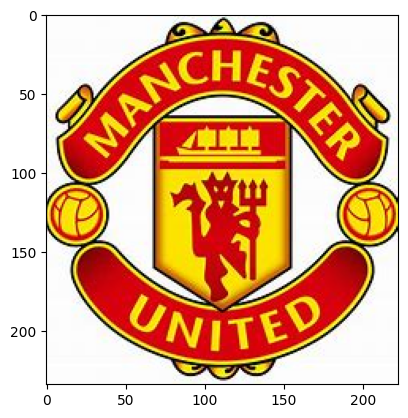

In [110]:
image = mpimg.imread("manchester_united.jpeg")
plt.imshow(image)
plt.show()

(234, 223)

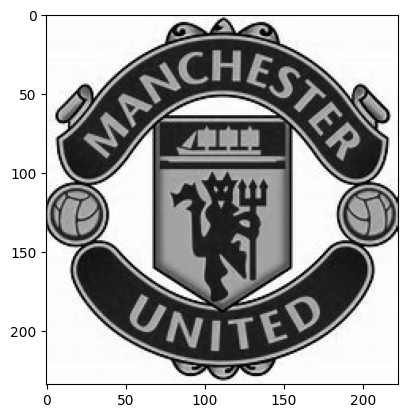

In [111]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
gray.shape

# Mean

In [112]:
meankernel3x3 = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])/9

In [113]:
meankernel9x9 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1]])/81

In [114]:
def Mean (image, rowkernel, columnkernel,window):
    row = int((rowkernel-1)/2)
    column = int((columnkernel-1)/2)
    image_pad = np.pad(image, [row,column], mode="edge") 
    result = np.zeros(image_pad.shape)

    for i in range (row, image_pad.shape[0] - row):
        for j in range (column, image_pad.shape[1] - column):
            imagepixel = image_pad[i-row:i+row+1, j-column:j+column+1] 
            result[i,j] = np.sum(imagepixel*window)
            
    return result

# Modus

In [115]:
def modus(matriks):
   subarray = matriks.flatten()
   for x in range(len(matriks)):
      for y in range(0, len(subarray)-x-1): 
         if subarray[y] > subarray[y+1]:
            subarray[y], subarray[y+1] = subarray[y+1], subarray[y]

   indeks = np.zeros (np.max(subarray) + 1, dtype= int )
   for i in range (len(subarray)):
      indeks[subarray[i]] += 1    
   cek = np.max(indeks)
   for j in range (len(indeks)):
      if (indeks[j] == cek):
         return j
        
def modusfiltering(image, rowkernel, columnkernel):
   result = np.zeros(image.shape)
   row, column = int((rowkernel-1)/2), int((columnkernel-1)/2)
   image_pad = np.pad (image, ((row, rowkernel-row-1), (column, columnkernel-column-1)), "edge" )
   for i in range (image.shape[0]):
      for j in range (image.shape[1]):
         result[i, j] = modus(image_pad[i:i+rowkernel, j:j+columnkernel])
   return result

# Median

In [116]:
def Median (image, rowkernel, columnkernel):
    row = int((rowkernel-1)/2)
    column = int((columnkernel-1)/2)
    image_pad = np.pad(image, [row,column], mode="edge")
    result = np.zeros(image.shape)
    
    for i in range  (row, image.shape[0] - row):
        for j in range (column, image.shape[1] - column):
            submatrix = image_pad[i-row:i+row+1, j-column:j+column+1]
            
            subarray = submatrix.flatten() 
            for x in range(len(subarray)):
                for y in range(0, len(subarray)-x-1):
                    if subarray[y] > subarray[y+1]:
                       subarray[y], subarray[y+1] = subarray[y+1], subarray[y]
            
            median = subarray[(len(subarray))//2]
            result[i-row, j-column] = median
           
    return result

# Sharpening Filter

In [126]:
def sharpeningFilter1(gray):
    kernel = np.array([[1/9, 1/9, 1/9],
                       [1/9, 8/9, 1/9],
                       [1/9, 1/9, 1/9]])
    sharpened_img = cv.filter2D(gray, -1, kernel)
    return sharpened_img


# Smoothing Filter

In [127]:
def smoothingFilter1(gray):
    kernel = np.array([[1/10, 1/10, 1/10],
                       [1/10, 1/5, 1/10],
                       [1/10, 1/10, 1/10]])
    smoothed_img = cv.filter2D(gray, -1, kernel)
    return smoothed_img


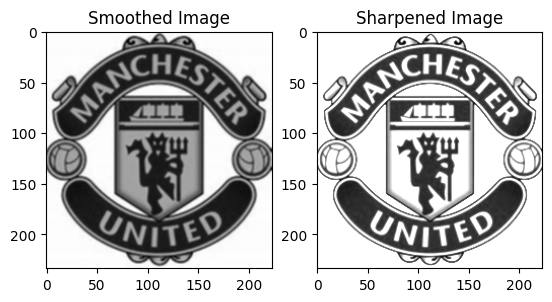

In [128]:
import cv2 as cv

smoothed_img = smoothingFilter1(gray)
sharpened_img = sharpeningFilter1(gray)

plt.subplot(1, 2, 1)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Smoothed Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')

plt.show()


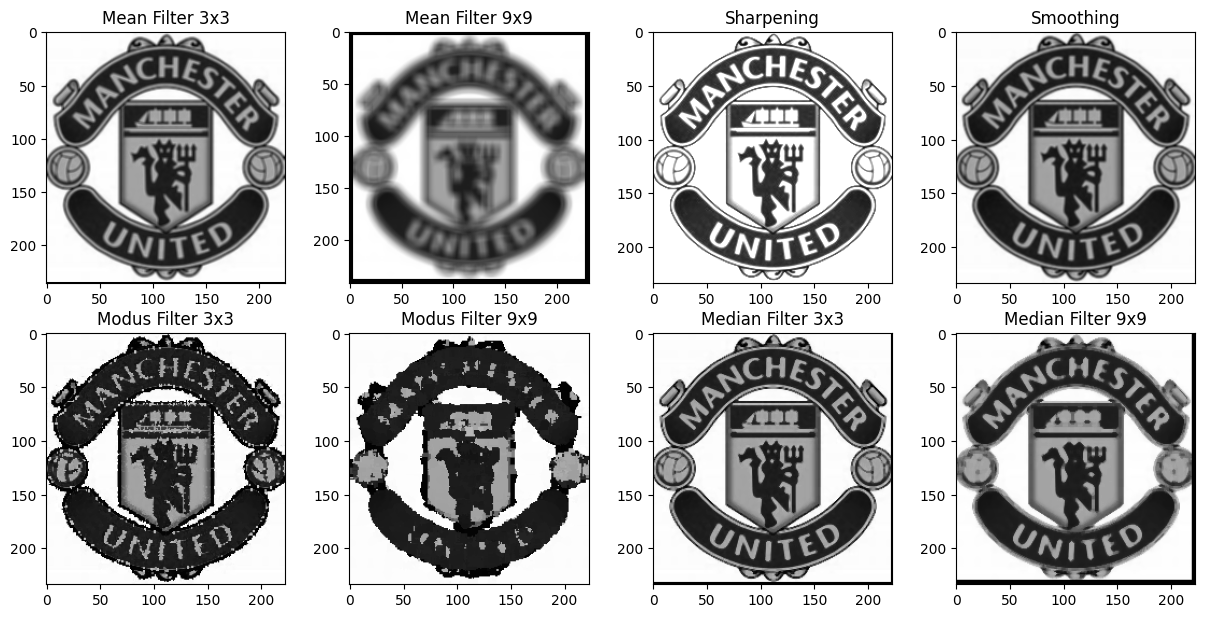

In [129]:
plt.figure(figsize = [15, 15])
plt.subplot(4,4,1); plt.title("Mean Filter 3x3"); plt.imshow(Mean(gray, 3, 3, meankernel3x3), cmap = "gray")
plt.subplot(4,4,2); plt.title("Mean Filter 9x9"); plt.imshow(Mean(gray, 9, 9, meankernel9x9), cmap = "gray")
plt.subplot(4,4,3); plt.title("Sharpening"); plt.imshow(sharpened_img, cmap='gray')
plt.subplot(4,4,4); plt.title("Smoothing"); plt.imshow(smoothed_img, cmap='gray')
plt.subplot(4,4,5); plt.title("Modus Filter 3x3"); plt.imshow(modusfiltering(gray, 3, 3), cmap = "gray")
plt.subplot(4,4,6); plt.title("Modus Filter 9x9"); plt.imshow(modusfiltering(gray, 9, 9), cmap = "gray")
plt.subplot(4,4,7); plt.title("Median Filter 3x3"); plt.imshow(Median(gray, 3, 3), cmap = "gray")
plt.subplot(4,4,8); plt.title("Median Filter 9x9"); plt.imshow(Median(gray, 5, 5), cmap = "gray")